# SIMULATION STUDY
## **Front Axle Kinematics**
-----------------

### STUDY DISCRIPTION
---------------------

_Double click to write a discription here ..._

-----------------------------------------------

In [2]:
import sys
pkg_path = '/home/khaledghobashy/Documents/asurt_cdt_symbolic'
sys.path.append(pkg_path)

In [3]:
import numpy as np
from asurt.numenv.python.interfaces.scripting import multibody_system, simulation

## ASSEMBLY IMPORT & CONFIGURATION ASSIGNMENT
---------------------------------------------

In [4]:
import numenv.assemblies as models
import numenv.configurations as configs

In [5]:
model = multibody_system(models.double_wishbone_assembly)

In [6]:
model.Subsystems.SU.set_configuration_file(configs.double_wishbone_direct_acting_cfg)
model.Subsystems.TR.set_configuration_file(configs.suspension_actuation_testrig_cfg)


## SETTING MODEL ACTUATION FUNCTIONS
------------------------------------

In [7]:
model.Subsystems.TR.config.AF_mcr_ver_act = lambda t : 90*np.sin(t)
model.Subsystems.TR.config.AF_mcl_ver_act = lambda t : 90*np.sin(t)

model.Subsystems.TR.config.AF_jcr_rev = lambda t :  np.deg2rad(360)*t
model.Subsystems.TR.config.AF_jcl_rev = lambda t : -np.deg2rad(360)*t

## MODEL CONFIGURATIONS
-----------------------

### CONFIGURATION VARIANT #1

#### SETTING CONFIGURATION DATA

In [8]:
import pandas as pd

In [9]:
SU_inputs_df = pd.read_csv('csv_files/double_wishbone_direct_acting_cfg.csv', index_col=0)
TR_inputs_df = pd.read_csv('csv_files/suspension_actuation_testrig_cfg.csv', index_col=0)

In [10]:
SU_inputs_df.loc['hpr_ucaf'] = [1300, 480, 615, 0]
SU_inputs_df.loc['hpr_ucar'] = [1520, 480, 630, 0]
SU_inputs_df.loc['hpr_ucao'] = [1410, 740, 630, 0]

SU_inputs_df.loc['hpr_lcaf'] = [1245, 400, 390, 0]
SU_inputs_df.loc['hpr_lcar'] = [1545, 400, 410, 0]
SU_inputs_df.loc['hpr_lcao'] = [1359, 774, 400, 0]

SU_inputs_df.loc['hpr_tri'] = [1575, 440, 448, 0]
SU_inputs_df.loc['hpr_tro'] = [1555, 780, 455, 0]

SU_inputs_df.loc['hpr_strut_chassis'] = [1410, 575, 545, 0]
SU_inputs_df.loc['hpr_strut_lca'] = [1395, 620, 400, 0]

SU_inputs_df.loc['hpr_wc'] = [1400, 800, 500, 0]
SU_inputs_df.loc['hpr_wc1'] = [1400, 700, 500, 0]
SU_inputs_df.loc['hpr_wc2'] = [1400, 900, 500, 0]

SU_inputs_df.loc['vcs_x'] = [1, 0, 0, 0]
SU_inputs_df.loc['vcs_y'] = [0, 1, 0, 0]
SU_inputs_df.loc['vcs_z'] = [0, 0, 1, 0]

SU_inputs_df.loc['s_hub_radius'] = [500, 0, 0, 0]
SU_inputs_df.loc['s_links_ro'] = [10, 0, 0, 0]
SU_inputs_df.loc['s_strut_inner'] = [25, 0, 0, 0]
SU_inputs_df.loc['s_strut_outer'] = [30, 0, 0, 0]
SU_inputs_df.loc['s_thickness'] = [10, 0, 0, 0]

In [11]:
SU_inputs_df.to_csv('csv_files/double_wishbone_direct_acting_cfg_mod.csv')

In [12]:
TR_inputs_df.loc['ax1_jcr_rev'] = [0, 1, 0, 0]
TR_inputs_df.loc['pt1_mcr_ver_act'] = [1400, 800, 0, 0]

In [13]:
TR_inputs_df.to_csv('csv_files/suspension_actuation_testrig_cfg_mod.csv')

In [14]:
model.Subsystems.SU._topology.config.load_from_dataframe(SU_inputs_df)
model.Subsystems.TR._topology.config.load_from_dataframe(TR_inputs_df)

#### CREATING A SIMULATION INSTANCE

In [15]:
sim1 = simulation('v1', model, 'kds')
sim1.set_time_array(2*np.pi, 100)
sim1.solve()


Running System Kinematic Analysis:
Progress: [=========================] 100%, (99/99) steps.

#### RESULTS' PLOTS

In [16]:
time_array = sim1.soln.time_array
vertical_travel = model.Subsystems.TR.config.AF_mcr_ver_act(time_array)

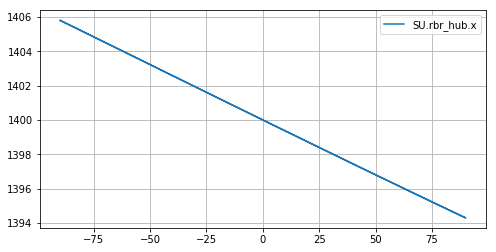

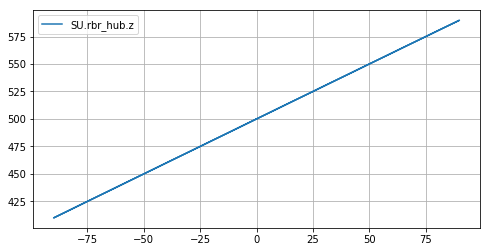

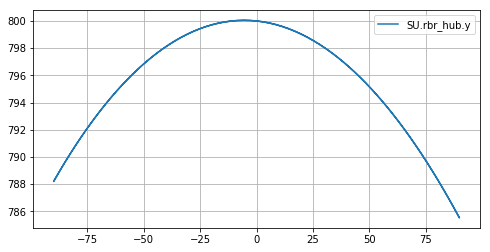

In [17]:
sim1.plot([('SU.rbr_hub.x', 'pos')], vertical_travel)
sim1.plot([('SU.rbr_hub.z', 'pos')], vertical_travel)
sim1.plot([('SU.rbr_hub.y', 'pos')], vertical_travel)